In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\MSI\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)

In [6]:
y=df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X)

In [11]:
polynomial_converter.transform(X).shape

(200, 9)

In [12]:
X.shape

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)

In [22]:
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [23]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test, test_predictions)

In [26]:
MSE = mean_squared_error(y_test,test_predictions)

In [27]:
RMSE = np.sqrt(MSE)

In [28]:
MAE

0.48967980448037

In [29]:
MSE

0.4417505510403648

In [30]:
RMSE

0.6646431757269196

In [31]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [33]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [34]:
#create different order poly
# split int otraining and test
# fit on train
# sotre/save the rmse for both the train and test data sets

In [44]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [45]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088463,
 0.1426544837726474,
 0.16675345956185658]

In [46]:
test_rmse_errors 

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.4040685804796,
 4449.568027403435,
 95893.02658330933]

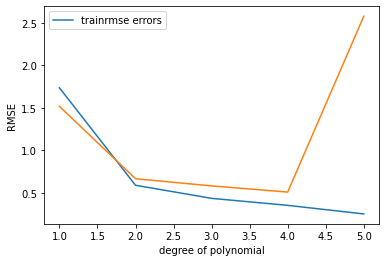

In [51]:
plt.plot(range(1,6),train_rmse_errors[0:5],label="trainrmse errors")
plt.plot(range(1,6),test_rmse_errors[0:5])
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend()

In [54]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [55]:
final_model = LinearRegression()

In [56]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X,y)

LinearRegression()

In [58]:
from joblib import dump,load

In [59]:
dump(final_model,"final_poly_model.jobib")

['final_poly_model.jobib']

In [60]:
dump(final_poly_converter,"final_converter.joblib")

['final_converter.joblib']

In [61]:
loaded_converter = load('final_converter.joblib')

In [65]:
loaded_model = load('final_poly_model.jobib')

In [66]:
campaign =[[149,22,12]]

In [68]:
loaded_model.predict(loaded_converter.fit_transform(campaign))

array([14.64501014])